In [68]:
import seaborn as sns
import pandas as pd

In [45]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [47]:
df.shape

(891, 15)

In [48]:
''' 
dropping null rows can be a bad idea because it can lead to loss of valuable data, especially if the dataset is small or if the missing values are not random. 
Instead, consider using imputation techniques to fill in missing values or analyze the patterns of missingness.
'''

df.dropna().shape

(182, 15)

In [49]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [50]:
'''
Dropping the columns with missing values can be a bad idea because it can lead to loss of valuable information
'''
df.dropna(axis=1).shape

(891, 11)

### Inputation techniques

1. Mean value imputatation. Use for normally distributed data

<Axes: xlabel='age', ylabel='Count'>

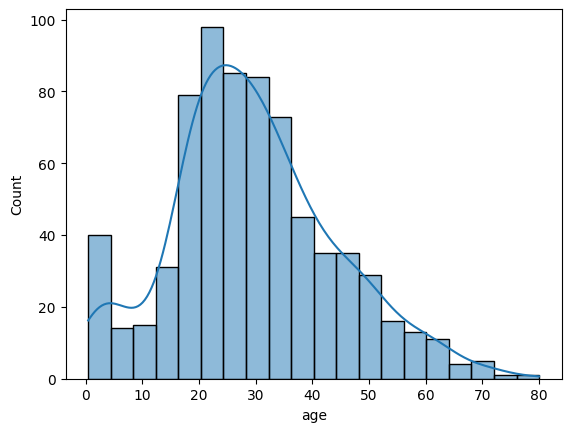

In [51]:
sns.histplot(df["age"], kde=True)

In [52]:
df["filled_age"] = df["age"].fillna(df["age"].mean())

<Axes: xlabel='filled_age', ylabel='Count'>

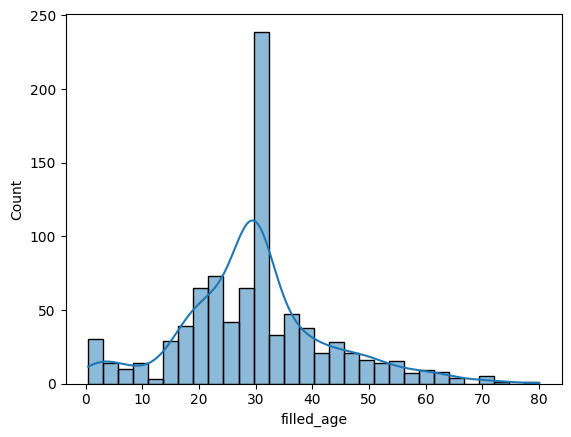

In [53]:
sns.histplot(df["filled_age"], kde=True)

2. Median Value imputation - If we have outliers

In [54]:
df["filled_age_median"] = df["age"].fillna(df["age"].median())

<Axes: xlabel='filled_age_median', ylabel='Count'>

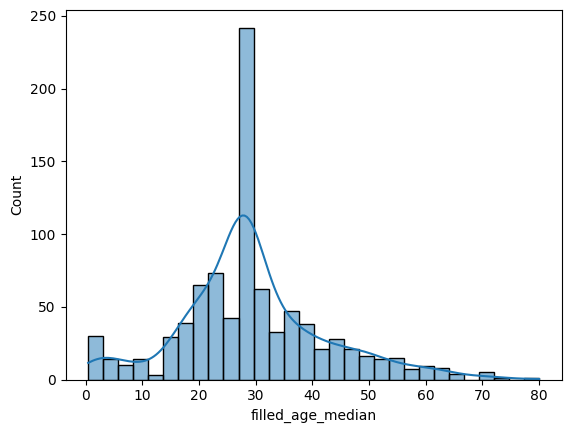

In [55]:
sns.histplot(df["filled_age_median"], kde=True)

3. Mode Value imputation - For categorical data

In [56]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [57]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]
mode_value

'S'

In [58]:
df['filled_embarked'] = df['embarked'].fillna(mode_value)

In [59]:
df['filled_embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [60]:
df[df['embarked'].isna()][['embarked', 'filled_embarked']]

,embarked,filled_embarked
61,NaN,S
829,NaN,S


In [62]:
from sklearn.datasets import make_classification

In [66]:
x, y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1, weights=[0.90], n_redundant=0, random_state=42)

In [69]:
df = pd.DataFrame(x, columns=['feature1', 'feature2'])
df2 = pd.DataFrame(y, columns=['target'])

In [70]:
df

,feature1,feature2
0,1.073546,-1.101339
1,0.755945,-1.172352
2,1.354479,-0.948528
3,3.103090,0.233485
4,1.951888,-0.270157
...,...,...
995,1.713939,0.451639
996,1.509473,-0.794996
997,-2.150901,-2.989372
998,2.451647,-0.156629


In [72]:
df2.value_counts()

target
0         896
1         104
Name: count, dtype: int64

In [73]:
final_df = pd.concat([df, df2], axis=1)
final_df.head()

,feature1,feature2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0


<Axes: xlabel='feature1', ylabel='feature2'>

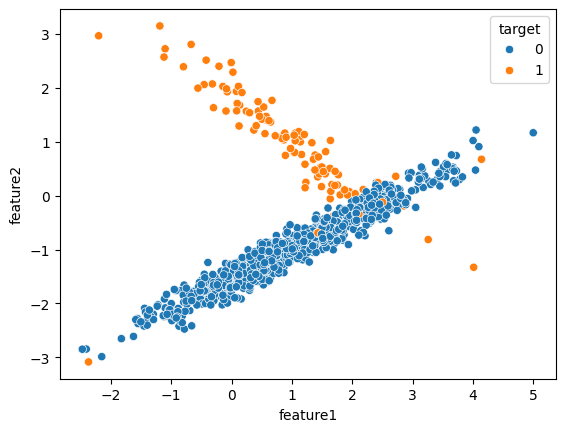

In [74]:
sns.scatterplot(data=final_df, x='feature1', y='feature2', hue='target')

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
ovesample = SMOTE(random_state=42)
X_resampled, y_resampled = ovesample.fit_resample(final_df[['feature1', 'feature2']], final_df['target'])

In [78]:
y_resampled.value_counts()

target
0    896
1    896
Name: count, dtype: int64

In [79]:
sampled_df = pd.concat([X_resampled, y_resampled], axis=1)

In [82]:
sampled_df['target'].value_counts()

target
0    896
1    896
Name: count, dtype: int64

<Axes: xlabel='feature1', ylabel='feature2'>

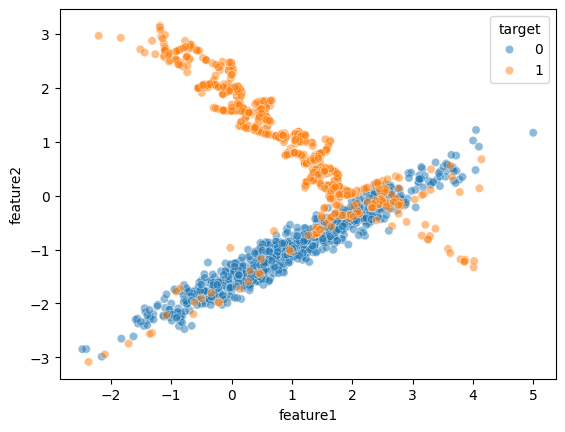

In [83]:
sns.scatterplot(data=sampled_df, x='feature1', y='feature2', hue='target', alpha=0.5, marker='o', edgecolor='w')